# Responsible Data Science
# Bias in Word Embeddings

https://ethically.ai/word-embedding

### Powerd by [`ethically`](https://docs.ethically.ai/) - Toolkit for Auditing and Mitigating Bias and Fairness of Machine Learning Systems 🔎🤖🧰

## by Shlomi Hod (shlomi[dot]hod[at]uni-potsdam[dot]de)


![](images/banner.png)

### Legend:
# 💎 Important
# ⚡ Be Aware - Debated issue / interpret carefully / simplicity over precision
# 🛠️ Setup/Technical (a.k.a "the code is not important")
# 🧪 Methodological Issue
# 💻 Hands-On - Your turn!
# 🦄 Out of Scope

![](images/banner.png)

## 🛠️ Install `ethically`
To install the latest stable version, you should run:
`!pip install --user ethically`

But we want the latest development version, so we will run:

In [ ]:
!pip install --user git+https://github.com/EthicallyAI/ethically.git@dev
!pip install --user ethically

## 🛠️ Validate Installation of `ethically`

In [1]:
import ethically

ethically.__version__

'0.0.5'

If you get an error of **`ModuleNotFoundError: No module named 'ethically'`** after the installation, and you work on **Colab** or **Binder** - this is **normal**.

**Restart** the Kernel/Runtime (use the menu on top), **skip** the installation cell (`!pip install --user ethically`) and **run** the previous cell (`import ethically`).

Now it all works!

![](images/banner.png)

## Motivation: Why to use Word Embeddings?

### [NLP (Natural Language Processing)](https://en.wikipedia.org/wiki/Natural_language_processing) - **Very partial** list of tasks


### 1. Classification
- Fake news classification
- Toxic comment classification
- Review raiting (sentiment analysis)
- Hiring decision making by CV
- Automated essay scoring

### 3. Machine Translation

### 2. Information Retrieval
- Search engine
- Plagiarism detection

### 3. Coreference Resolution
![](images/corefexample.png)
<small>Source: [Stanford Natural Language Processing Group](https://nlp.stanford.edu/projects/coref.shtml)


<br><br><br><br>


<center>
<h1> Esessional Question - How to encode Words into Numbers?</h1>
</center>

### Idea: Bag of Words (for a document)
![](images/bow.png)
<small>Source: Zheng, A.& Casari, A. (2018). Feature Engineering for Machine Learning. O'Reilly Media.</small>

### One-Hot Representation - The Issue with Text

![](https://www.tensorflow.org/images/audio-image-text.png)
<small>Source: [Tensorflow Documentation](https://www.tensorflow.org/tutorials/representation/word2vec)</small>


## 💎 Idea: Embedding a word in a n-dimensional space

### Distributional Hypothesis
> "a word is characterized by the company it keeps" - [John Rupert Firth](https://en.wikipedia.org/wiki/John_Rupert_Firth)

#### 🦄 Training: using *word-context* relationships from a corpus. See: [The Illustrated Word2vec by Jay Alammar](http://jalammar.github.io/illustrated-word2vec/)

### Distance ~ Meaning Similarity

## 🦄 Examples (algorithms and pre-trained models)
- [Word2Vec](https://code.google.com/archive/p/word2vec/)
- [GloVe](https://nlp.stanford.edu/projects/glove/)
- [fastText](https://fasttext.cc/)
- [ELMo](https://allennlp.org/elmo) (contextualized)

### 🦄 State of the Art
[The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning)
](http://jalammar.github.io/illustrated-bert/)

## Let's play with Word2Vec word embedding...!

[Word2Vec](https://code.google.com/archive/p/word2vec/) - Google News - 100B tokens, 3M vocab, cased, 300d vectors - only lowercase vocab extracted

Loaded using [`ethically`](http://docs.ethically.ai) package, the function [`ethically.we.load_w2v_small`]() returns a [`gensim`](https://radimrehurek.com/gensim/)'s [`KeyedVectors`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors) object.

In [2]:
# 🛠️⚡ ignore warnings
# generally, you shouldn't do that, but for this tutorial we'll do so for the sake of simplicity

import warnings
warnings.filterwarnings('ignore')

In [3]:
from ethically.we import load_w2v_small

w2v_small = load_w2v_small()

In [4]:
# vocabulary size

len(w2v_small.vocab)

26423

In [5]:
# get the vector of the word "home"

print('home =', w2v_small['home'])

home = [-0.00584168  0.0392657   0.00831084 -0.0443245   0.0426382   0.0119243
  0.0125867  -0.0934669   0.0698593   0.0416747   0.0838311  -0.123338
 -0.0263779  -0.0139718   0.0224031  -0.07275     0.00605246  0.0278233
  0.00963576  0.106475    0.0775679  -0.0785314   0.0436018  -0.052274
 -0.00201749 -0.0115027  -0.0243303   0.0402293   0.0187897   0.00087324
  0.027221    0.0184284  -0.0722682  -0.0187897  -0.027221    0.00560078
 -0.0387839  -0.0737135   0.0445654   0.0183079   0.0436018  -0.00731715
  0.0900943   0.047697   -0.027221    0.0804586   0.0195124   0.0809404
  0.0414338   0.0137912  -0.016983    0.146464    0.0693775   0.0486606
 -0.0910579  -0.130083   -0.0597417   0.0900943   0.0112618  -0.0209578
 -0.0101778   0.0407111  -0.00069257  0.0110811  -0.0375795   0.0133696
 -0.0232463   0.0278233  -0.00123458  0.0558874   0.063596   -0.047697
  0.0332434  -0.0402293  -0.0520331   0.0344478  -0.011322    0.0030714
  0.00909375 -0.0128878   0.0285459   0.0380612   0.00502

In [6]:
# the word embedding dimension, in this case, is 300

len(w2v_small['home'])

300

In [7]:
# all the words are normalized (=have norm equal to one as vectors)

from numpy.linalg import norm

norm(w2v_small['home'])

1.0

In [8]:
# 🛠️ make sure that all the vectors are normalized!

from numpy.testing import assert_almost_equal

length_vectors = norm(w2v_small.vectors, axis=1)

assert_almost_equal(actual=length_vectors,
                    desired=1,
                    decimal=5)

## 💎 Demo - Mesuring Distance between Words

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Sphere_wireframe_10deg_6r.svg/480px-Sphere_wireframe_10deg_6r.svg.png)

### Mesure of Similiarty: [Cosine Similariy](https://en.wikipedia.org/wiki/Cosine_similarity)
#### Measures the cosine of the angle between two vecotrs.
#### Ranges between 1 (same vector) to -1 (opposite/antipode vector)

#### In Python, for normalized vectors (Numpy's array), use the `@`(at) operator!


In [9]:
w2v_small['cat'] @ w2v_small['cat']

1.0000006

In [10]:
w2v_small['cat'] @ w2v_small['cats']

0.8099383

In [11]:
from math import acos, degrees

degrees(acos(w2v_small['cat'] @ w2v_small['cats']))

35.910095270739426

In [12]:
w2v_small['cat'] @ w2v_small['dog']

0.76094615

In [13]:
degrees(acos(w2v_small['cat'] @ w2v_small['dog']))

40.45232006805675

In [14]:
w2v_small['cat'] @ w2v_small['cow']

0.40352482

In [15]:
degrees(acos(w2v_small['cat'] @ w2v_small['cow']))

66.20128249356603

In [16]:
w2v_small['cat'] @ w2v_small['graduated']

-0.0037888326

In [17]:
degrees(acos(w2v_small['cat'] @ w2v_small['graduated']))

90.21708463522016

# 💎 In general, the use of Word Embedding to encode words, as an input for NLP systems (*), improve their performance compared to one-hot representation.

* Sometimes the embedding is learned as part of the NLP system.

## 🛠️ Demo - Visualization Word Embedding in 2D using T-SNE 

<small>Source: [Google's Seedbank](https://research.google.com/seedbank/seed/pretrained_word_embeddings)</small>

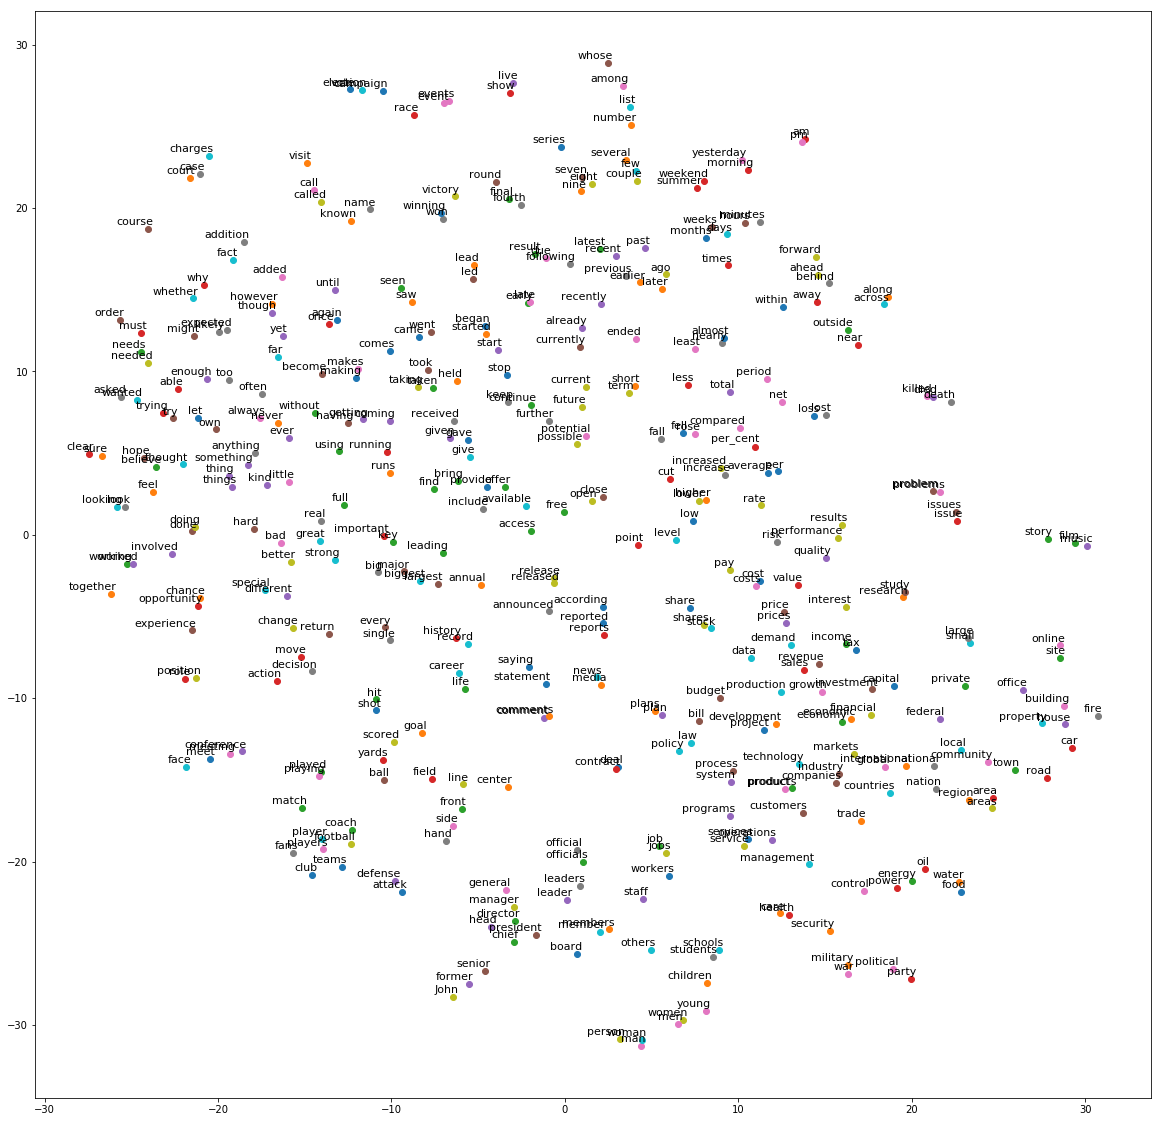

In [19]:
from sklearn.manifold import TSNE
from matplotlib import pylab as plt

# take the most common words in the corpus between 200 and 600
words = [word for word in w2v_small.index2word[200:600]]

# convert the words to vectors
embeddings = [w2v_small[word] for word in words]

# perform T-SNE
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=11)
plt.show()

## Demo - [Tensorflow Embedding Projector](http://projector.tensorflow.org)

⚡ Be cautious: It is easy to see "patterns".

## Demo - Most Similar

What are the most simlar words (=closer) to a given word?

In [27]:
w2v_small.most_similar('cat')

[('cats', 0.8099379539489746),
 ('dog', 0.7609457969665527),
 ('kitten', 0.7464984059333801),
 ('feline', 0.7326232194900513),
 ('puppy', 0.707545280456543),
 ('pup', 0.6934290528297424),
 ('pet', 0.6891530752182007),
 ('pooch', 0.6699831485748291),
 ('poodle', 0.6621246337890625),
 ('dogs', 0.6418520212173462)]

## [EXTRA] Demo - Doesn't Match

Given a list of words, which one doesn't match?

The word further away from the mean of all words.

In [28]:
w2v_small.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

## Demo - Vector Arithmetic

In [29]:
# nature + science = ?

w2v_small.most_similar(positive=['nature', 'science'])

[('biology', 0.5784977674484253),
 ('ecology', 0.5561813116073608),
 ('scientific', 0.5484972596168518),
 ('sciences', 0.5216706991195679),
 ('physics', 0.49387651681900024),
 ('geography', 0.4893345832824707),
 ('geology', 0.4885982275009155),
 ('mathematics', 0.48719534277915955),
 ('humanities', 0.48349493741989136),
 ('astronomy', 0.46454447507858276)]

## 💎 More Vector Arithmetic

![](https://www.tensorflow.org/images/linear-relationships.png)
<small>Source: [Tensorflow Documentation](https://www.tensorflow.org/tutorials/representation/word2vec)</small>

## Demo - Vector Analogy

In [30]:
# man:king :: woman:?
# king - man + woman = ?

w2v_small.most_similar(positive=['king', 'woman'],
                       negative=['man'])

[('queen', 0.7118192315101624),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236842632293701),
 ('queens', 0.5181134939193726),
 ('monarchy', 0.5087413787841797),
 ('throne', 0.5005807876586914),
 ('royal', 0.4938204884529114),
 ('ruler', 0.4909273684024811)]

In [31]:
w2v_small.most_similar(positive=['big', 'smaller'],
                       negative=['small'])

[('bigger', 0.7836997509002686),
 ('larger', 0.5866795778274536),
 ('biggest', 0.5240509510040283),
 ('huge', 0.5084124207496643),
 ('sharper', 0.4824290871620178),
 ('heavier', 0.4784499406814575),
 ('tougher', 0.46322107315063477),
 ('better', 0.46317416429519653),
 ('major', 0.4562188386917114),
 ('quicker', 0.45142698287963867)]

## Think about a DIRECTION in word embedding as a RELATION

# $\overrightarrow{she} - \overrightarrow{he}$
# $\overrightarrow{smaller} - \overrightarrow{small}$
# $\overrightarrow{Spain} - \overrightarrow{Madrid}$


### ⚡ Direction is not a word vector by itself!

### ⚡ But it doesn't work all the time...

In [32]:
w2v_small.most_similar(positive=['forward', 'up'],
                       negative=['down'])

[('ahead', 0.3578284978866577),
 ('exciting', 0.3406263291835785),
 ('excited', 0.32841262221336365),
 ('closer', 0.32427978515625),
 ('together', 0.3161127269268036),
 ('future', 0.30869507789611816),
 ('welcome', 0.30304622650146484),
 ('with', 0.30031606554985046),
 ('looking', 0.29965412616729736),
 ('eagerly', 0.29952746629714966)]

It might be because we have the"looking forward" which is acossiated with "excitement" in the data.

### ⚡🦄 Keep in mind the word embedding was generated by learning the co-occurrence of words, so the fact that it *empirically* exhibit "concept arithmetic", it doesn't necessarily mean it learned it! In fact, it seems it didn't.
See: [king - man + woman is queen; but why? by Piotr Migdał](https://p.migdal.pl/2017/01/06/king-man-woman-queen-why.html)

### 🦄 [Demo - Word Analogies Visualizer by Julia Bazińska](https://lamyiowce.github.io/word2viz/)

### ⚡🦄 In fact, `w2v_small.most_similar` find the most closest word which *is not one* of the given ones. This is a real methodological issue. Nowadays, it is not a common practice to evaluate word embedding with analogies.

You can use `from ethically.we import most_similar` for the unrestricted version.

![](images/banner.png)

# Gender Bias
Keep in mind, the data is from Google News, the writers are professional journalists.

### Bolukbasi Tolga, Kai-Wei Chang, James Y. Zou, Venkatesh Saligrama, and Adam T. Kalai. [Man is to computer programmer as woman is to homemaker? debiasing word embeddings](https://arxiv.org/abs/1607.06520). NIPS 2016.

## Gender appropriate he-she analogies

In [33]:
# she:sister :: he:?
# sister - she + he = ?

w2v_small.most_similar(positive=['sister', 'he'],
                       negative=['she'])

[('brother', 0.7627110481262207),
 ('younger_brother', 0.685613214969635),
 ('cousin', 0.6685015559196472),
 ('uncle', 0.6580698490142822),
 ('nephew', 0.65260249376297),
 ('father', 0.6411106586456299),
 ('son', 0.6308269500732422),
 ('elder_brother', 0.585418701171875),
 ('brothers', 0.5706700086593628),
 ('twin_brother', 0.5622221231460571)]

```
queen-king
waitress-waiter
sister-brother
mother-father
ovarian_cancer-prostate_cancer
convent-monastery
```

## Gender stereotype he-she analogies

In [34]:
w2v_small.most_similar(positive=['nurse', 'he'],
                       negative=['she'])

[('doctor', 0.5559605956077576),
 ('medic', 0.5425378680229187),
 ('physician', 0.5394272208213806),
 ('surgeon', 0.5160146951675415),
 ('nurses', 0.49741461873054504),
 ('paramedic', 0.4924110770225525),
 ('patient', 0.46544167399406433),
 ('doctors', 0.4639861285686493),
 ('nursing', 0.46371760964393616),
 ('registered_nurse', 0.46238088607788086)]

```
sewing-carpentry
nurse-doctor
blond-burly
giggle-chuckle
sassy-snappy
volleyball-football
register_nurse-physician
interior_designer-architect
feminism-conservatism
vocalist-guitarist
diva-superstar
cupcakes-pizzas
housewife-shopkeeper
softball-baseball
cosmetics-pharmaceuticals
petite-lanky
charming-affable
hairdresser-barber
```

### But with the unrestricted version...

In [35]:
from ethically.we import most_similar

In [36]:
most_similar(w2v_small,
             positive=['nurse', 'he'],
             negative=['she'])

[('nurse', 0.6655273495904703),
 ('doctor', 0.5559606137533434),
 ('medic', 0.5425378462972461),
 ('physician', 0.5394272323455911),
 ('surgeon', 0.5160147186457839),
 ('nurses', 0.4974145881391677),
 ('paramedic', 0.49241111606754945),
 ('patient', 0.46544163768108626),
 ('doctors', 0.4639861118797595),
 ('nursing', 0.46371760823347813)]

## ⚡ Be Aware: According to a recent paper, it seems that the method of generating analogies enforce producing gender sterotype ones!

Nissim, M., van Noord, R., van der Goot, R. (2019). [Fair is Better than Sensational: Man is to Doctor as Woman is to Doctor](https://arxiv.org/abs/1905.09866).

... and a [Twitter thread](https://twitter.com/adamfungi/status/1133865428663635968) between the authors of the two papares.

## My takeaway (and as well as of other researchers): Analogies are not approriate method to observe bias in word embedding.

## 🧪 What if our methodology introduce a bias?

## 💎 What can we take from analogies? Gender Direction!

# $\overrightarrow{she} - \overrightarrow{he}$

In [37]:
gender_direction = w2v_small['she'] - w2v_small['he']

gender_direction /= norm(gender_direction)

In [38]:
gender_direction @ w2v_small['architect']

-0.16785556

In [39]:
gender_direction @ w2v_small['interior_designer']

0.19714224

### ⚡Interprete carefully: The word *architect* appears in more contexts with *he* than with *she*, and vice versa for *interior designer*.

🦄 In practice, we calculate the gender direction using multiple definitional pair of words for better estimation (words may have more than one meaning):

- woman - man
- girl - boy
- she - he
- mother - father
- daughter - son
- gal - guy
- female - male
- her - his
- herself - himself
- Mary - John

## 💻 Try some words by yourself
⚡ Keep in mind: You are performing exploratory data analysis, and not evaluate systematically!

In [50]:
gender_direction @ w2v_small['lover']

0.106604524

## 💎 So What?

### Downstream Application

### Toy Example - Search Engine Ranking

- "MIT PhD. Student"
- "doctoral candidate" ~ "PhD. student"
- John:computer programmer :: Mary:homemaker

### Universal Embeddings
- Pre-trained on a large corpus
- Plugged in downstream task models (sentimental analysis, classification, translation …)
- Improvement of performances

## Measuring Bias in Word Embedding

# Think-Pair-Shar

```


















```
# Basic Ideas: Use neutral-gender words!
```


















```

# Neutral Professions!

### Projections

In [51]:
from ethically.we import GenderBiasWE

w2v_small_gender_bias = GenderBiasWE(w2v_small, only_lower=True)

In [52]:
w2v_small_gender_bias.positive_end, w2v_small_gender_bias.negative_end

('she', 'he')

In [53]:
# gender direction
w2v_small_gender_bias.direction[:10]

array([-0.10056252, -0.09987912, -0.05384335,  0.00480521,  0.01521063,
       -0.01666582,  0.00932551, -0.00625998, -0.11320096,  0.03992424])

In [54]:
from ethically.we.data import BOLUKBASI_DATA

neutral_profession_names = BOLUKBASI_DATA['gender']['neutral_profession_names']

In [55]:
neutral_profession_names[:8]

['accountant',
 'acquaintance',
 'actor',
 'adjunct_professor',
 'administrator',
 'adventurer',
 'advocate',
 'aide']

In [56]:
len(neutral_profession_names)

303

In [57]:
# the same of using the @ operator on the bias direction

w2v_small_gender_bias.project_on_direction(neutral_profession_names[0])

0.008421653826199173

#### Let's visualize the projections of professions (neutral and specific by the orthography) on the gender direction

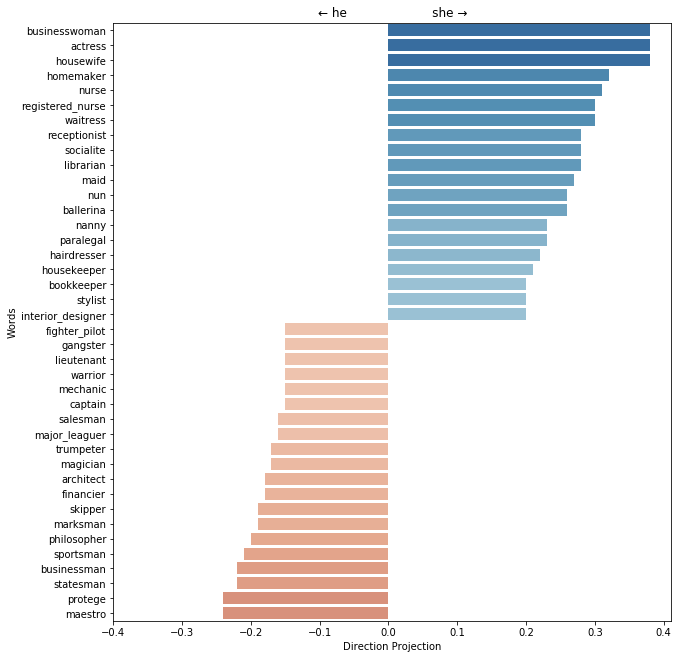

In [62]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 11))

w2v_small_gender_bias.plot_projection_scores(n_extreme=20, ax=ax);

### Is the projection of occupation words on the gender direction related to the real world?

Let's take the percentage of female in various occupations from the Labor Force Statistics of 2017 Population Survey.

Taken from: https://arxiv.org/abs/1804.06876

In [63]:
from operator import itemgetter  # 🛠️ For idiomatic sorting in Python

from ethically.we.data import OCCUPATION_FEMALE_PRECENTAGE

sorted(OCCUPATION_FEMALE_PRECENTAGE.items(), key=itemgetter(1))

[('carpenter', 2),
 ('mechanician', 4),
 ('construction_worker', 4),
 ('laborer', 4),
 ('driver', 6),
 ('sheriff', 14),
 ('mover', 18),
 ('developer', 20),
 ('farmer', 22),
 ('guard', 22),
 ('chief', 27),
 ('janitor', 34),
 ('lawyer', 35),
 ('cook', 38),
 ('physician', 38),
 ('ceo', 39),
 ('analyst', 41),
 ('manager', 43),
 ('supervisor', 44),
 ('salesperson', 48),
 ('editor', 52),
 ('designers', 54),
 ('accountant', 61),
 ('auditor', 61),
 ('writer', 63),
 ('baker', 65),
 ('clerk', 72),
 ('cashier', 73),
 ('counselors', 73),
 ('attendant', 76),
 ('teacher', 78),
 ('sewer', 80),
 ('librarian', 84),
 ('assistant', 85),
 ('cleaner', 89),
 ('housekeeper', 89),
 ('nurse', 90),
 ('receptionist', 90),
 ('hairdressers', 92),
 ('secretary', 95)]

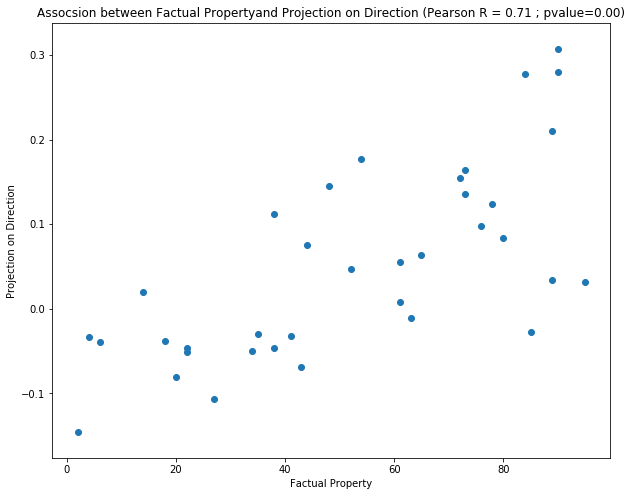

In [64]:
f, ax = plt.subplots(1, figsize=(10, 8))

w2v_small_gender_bias.plot_factual_association(ax=ax);

### Also: Word embeddings quantify 100 years of gender stereotypes

Garg, N., Schiebinger, L., Jurafsky, D., & Zou, J. (2018). [Word embeddings quantify 100 years of gender and ethnic stereotypes](https://www.pnas.org/content/pnas/115/16/E3635.full.pdf). Proceedings of the National Academy of Sciences, 115(16), E3635-E3644.

![](images/gender-bias-over-decades.png)

<small>Data: Google Books/Corpus of Historical American English (COHA)</small>

Word embedding is sometimes used to analyze a collection of text in **digital humanities**.

#### 🧪 Quite strong and interesting observation! We used "external" data which wan't used directly to create the word embedding.

### Direct Bias Measure

1. Project each **neutral profession names** on the gender direction
2. Calculate the absolute value of each projection
3. Average it all

In [65]:
# using ethically

w2v_small_gender_bias.calc_direct_bias()

0.07307905358773405

In [66]:
# what ethically does:

neutral_profession_projections = [w2v_small[word] @ w2v_small_gender_bias.direction
                                  for word in neutral_profession_names]

abs_neutral_profession_projections = [abs(proj) for proj in neutral_profession_projections]

sum(abs_neutral_profession_projections) / len(abs_neutral_profession_projections)

0.07307905349475179

#### 🧪 What are the assumptions of the direct bias measure? How the choice of neutral word effect on the definition of the bias?

### [EXTRA] Indirect Bias Measure
Similarity due to shared "gender direction" projection

In [67]:
w2v_small_gender_bias.generate_closest_words_indirect_bias('softball',
                                                           'football')

projection  indirect_bias
end      word                                       
softball bookkeeper          0.178528       0.201158
         receptionist        0.158782       0.672343
         registered_nurse    0.156625       0.287150
         waitress            0.145104       0.317843
         paralegal           0.142549       0.372737
football cleric             -0.165978       0.017845
         maestro            -0.180458       0.415805
         pundit             -0.193207       0.101227
         businessman        -0.195981       0.170078
         footballer         -0.337857       0.015365

## Debias

### Neutralize

In this case, we will remove the gender projection from all the words, except the neutral-gender ones, and then normalize.

🦄 We need to "learn" what are the gender-specific words in the vocabulary for a seed set of gender-specific words (by semi-automatic use of [WordNet](https://en.wikipedia.org/wiki/WordNet))

In [68]:
w2v_small_gender_debias = w2v_small_gender_bias.debias(method='neutralize', inplace=False)

In [69]:
print('home:',
      'before =', w2v_small_gender_bias.model['home'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['home'] @ w2v_small_gender_debias.direction)

home: before = 0.011340500455659965 after =  -7.193313028563963e-10


In [70]:
print('man:',
      'before =', w2v_small_gender_bias.model['man'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['man'] @ w2v_small_gender_debias.direction)

man: before = -0.22095191209141327 after =  -0.22095191209141327


In [71]:
print('woman:',
      'before =', w2v_small_gender_bias.model['woman'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['woman'] @ w2v_small_gender_debias.direction)

woman: before = 0.34034749005638193 after =  0.34034749005638193


In [72]:
w2v_small_gender_debias.calc_direct_bias()

1.2188740122295169e-09

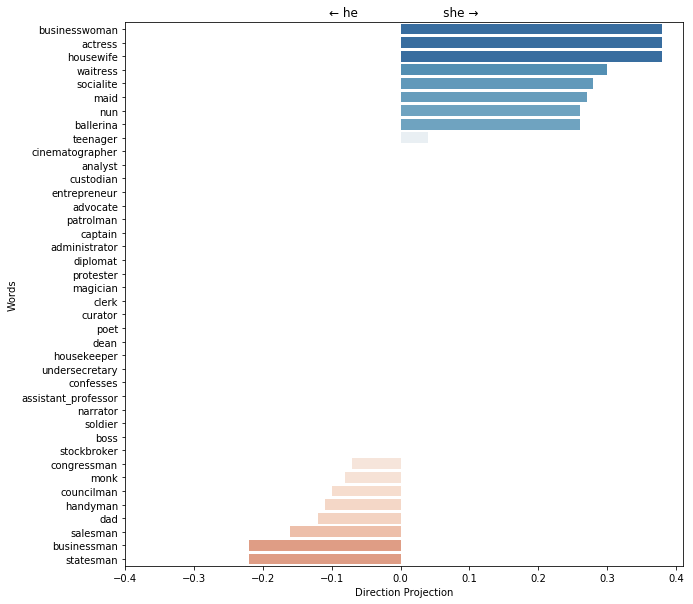

In [73]:
f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_debias.plot_projection_scores(n_extreme=20, ax=ax);

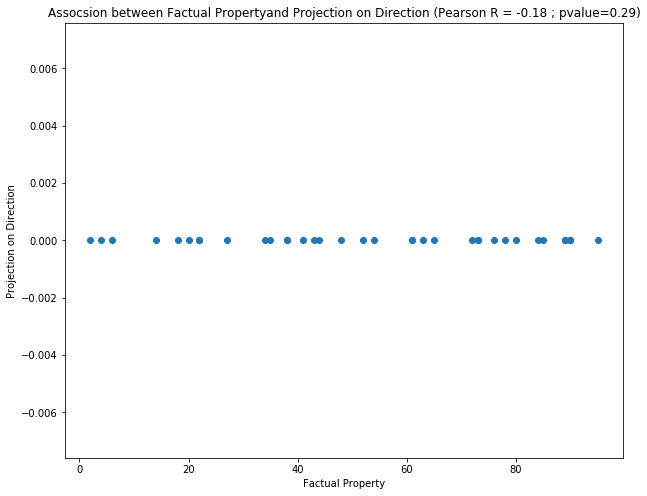

In [74]:
f, ax = plt.subplots(1, figsize=(10, 8))

w2v_small_gender_debias.plot_factual_association(ax=ax);

### [EXTRA] Equalize

- Do you see that `man` and `woman` have a different projection on the gender direction? 

- It might cause to different similarity (distance) to neutral words, such as to `kitchen`

In [75]:
w2v_small_gender_debias.model['man'] @ w2v_small_gender_debias.model['kitchen']

0.10391627

In [76]:
w2v_small_gender_debias.model['woman'] @ w2v_small_gender_debias.model['kitchen']

0.09767781

In [77]:
BOLUKBASI_DATA['gender']['equalize_pairs'][:10]

[['monastery', 'convent'],
 ['spokesman', 'spokeswoman'],
 ['Catholic_priest', 'nun'],
 ['Dad', 'Mom'],
 ['Men', 'Women'],
 ['councilman', 'councilwoman'],
 ['grandpa', 'grandma'],
 ['grandsons', 'granddaughters'],
 ['prostate_cancer', 'ovarian_cancer'],
 ['testosterone', 'estrogen']]

### Hard Debias = Neutralize + Equalize

In [78]:
w2v_small_gender_debias = w2v_small_gender_bias.debias(method='hard', inplace=False)

In [79]:
print('home:',
      'before =', w2v_small_gender_bias.model['home'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['home'] @ w2v_small_gender_debias.direction)

home: before = 0.011340500455659965 after =  -7.193313028563963e-10


In [80]:
print('man:',
      'before =', w2v_small_gender_bias.model['man'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['man'] @ w2v_small_gender_debias.direction)

man: before = -0.22095191209141327 after =  -0.34693400527480933


In [81]:
print('woman:',
      'before =', w2v_small_gender_bias.model['woman'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['woman'] @ w2v_small_gender_debias.direction)

woman: before = 0.34034749005638193 after =  0.3469340059022882


In [82]:
w2v_small_gender_debias.calc_direct_bias()

1.2624573262767274e-09

In [83]:
w2v_small_gender_debias.model['man'] @ w2v_small_gender_debias.model['kitchen']

0.10079704

In [84]:
w2v_small_gender_debias.model['woman'] @ w2v_small_gender_debias.model['kitchen']

0.100797035

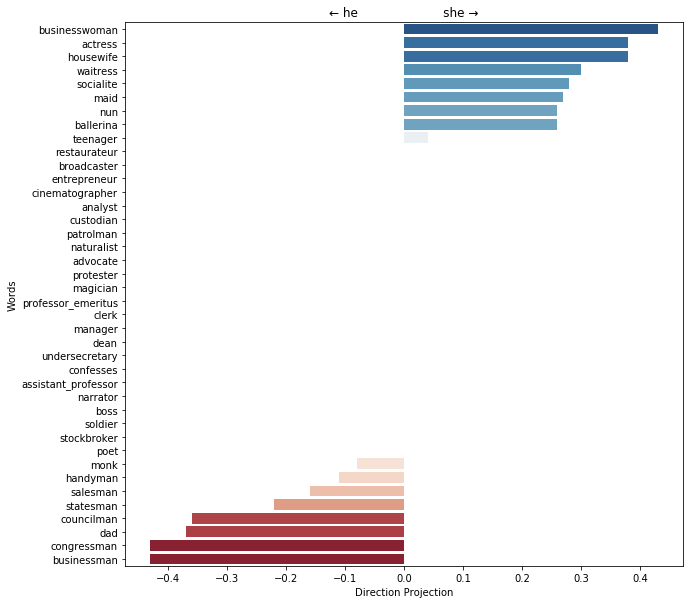

In [85]:
f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_debias.plot_projection_scores(n_extreme=20, ax=ax);

### Compare Preformances

After debiasing, the performance of the word embedding, using standard benchmarks, get only slightly worse!

### ⚠️ It might take few minutes to run!

In [86]:
w2v_small_gender_bias.evaluate_word_embedding()

(           pearson_r  pearson_pvalue  spearman_r  spearman_pvalue  \
 WS353          0.645           0.000       0.688            0.000   
 RG65           0.576           0.232       0.493            0.321   
 RW             0.611           0.000       0.655            0.000   
 Mturk          0.650           0.000       0.674            0.000   
 MEN            0.766           0.000       0.782            0.000   
 SimLex999      0.456           0.000       0.444            0.000   
 TR9856         0.666           0.000       0.676            0.000   
 
            ratio_unkonwn_words  
 WS353                    9.915  
 RG65                    14.286  
 RW                      77.384  
 Mturk                    1.558  
 MEN                     15.148  
 SimLex999                1.702  
 TR9856                  89.722  ,             score
 MSR-syntax  0.750
 Google      0.729)

In [87]:
w2v_small_gender_debias.evaluate_word_embedding()

(           pearson_r  pearson_pvalue  spearman_r  spearman_pvalue  \
 WS353          0.643           0.000       0.685            0.000   
 RG65           0.574           0.234       0.493            0.321   
 RW             0.611           0.000       0.655            0.000   
 Mturk          0.651           0.000       0.675            0.000   
 MEN            0.766           0.000       0.782            0.000   
 SimLex999      0.459           0.000       0.447            0.000   
 TR9856         0.665           0.000       0.674            0.000   
 
            ratio_unkonwn_words  
 WS353                    9.915  
 RG65                    14.286  
 RW                      77.384  
 Mturk                    1.558  
 MEN                     15.148  
 SimLex999                1.702  
 TR9856                  89.722  ,             score
 MSR-syntax  0.751
 Google      0.726)

![](images/banner.png)

# 💎 So What?

We removed the gender bias, **as we defined it**, in a word embedding - Is there any impact on a downstream application?


### Zhao, J., Wang, T., Yatskar, M., Ordonez, V., & Chang, K. W. (2018). [Gender bias in coreference resolution: Evaluation and debiasing methods](https://par.nsf.gov/servlets/purl/10084252). NAACL-HLT 2018.


#### WinoBias Dataset
![](images/coref-example.png)


#### Stereotypical Occupations (the source of `ethically.we.data.OCCUPATION_FEMALE_PRECENTAGE`)
![](images/coref-occupations.png)

#### Results
![](images/coref-results.png)


EE = UW End-to-end Neural Coreference Resolution System


### Zhao, J., Zhou, Y., Li, Z., Wang, W., & Chang, K. W. (2018). [Learning gender-neutral word embeddings](https://arxiv.org/pdf/1809.01496.pdf). EMNLP 2018.

#### Another debias method (tailor-made for GloVe training process)

![](images/gn-glove-results.png)

![](images/banner.png)

# 💎💎 Meta "So What?" - I

## How should we definition of "bias" in word embedding?

### 1. Intrinsic (e.g., direct bias)

### 2. External - Downstream application (e.g., coreference resolution, classification)

![](images/banner.png)

# 💎 Have we really removed the bias?

Let's look on another metric, called **WEAT** (Word Embedding Association Test) which is inspired by **IAT** (Implicit-Association Test) from Pyschology.

### Caliskan, A., Bryson, J. J., & Narayanan, A. (2017). [Semantics derived automatically from language corpora contain human-like biases.](http://www.cs.bath.ac.uk/~jjb/ftp/CaliskanEtAl-authors-full.pdf) Science, 356(6334), 183-186.


### Ingredients

1. Target words (e.g., Male ve. Female)

2. Attribute words (e.g., Math vs. Arts)

In [88]:
from copy import deepcopy  # 🛠️ For copying a nested data structure in Python

from ethically.we.weat import WEAT_DATA


# B. A. Nosek, M. R. Banaji, A. G. Greenwald, Math=male, me=female, therefore math≠me.,
# Journal of Personality and Social Psychology 83, 44 (2002).
weat_gender_science_arts = deepcopy(WEAT_DATA[7])

In [89]:
# 🛠️ filter words from the original IAT experiment that are not presend in the reduced Word2Vec model

from ethically.we.weat import _filter_by_model_weat_stimuli

_filter_by_model_weat_stimuli(weat_gender_science_arts, w2v_small)

In [90]:
weat_gender_science_arts['first_attribute']

{'name': 'Male terms',
 'words': ['brother',
  'father',
  'grandfather',
  'he',
  'him',
  'his',
  'son',
  'uncle']}

In [91]:
weat_gender_science_arts['second_attribute']

{'name': 'Female terms',
 'words': ['aunt',
  'daughter',
  'grandmother',
  'her',
  'hers',
  'mother',
  'she',
  'sister']}

In [92]:
weat_gender_science_arts['first_target']

{'name': 'Science',
 'words': ['astronomy',
  'chemistry',
  'experiment',
  'physics',
  'science',
  'technology']}

In [93]:
weat_gender_science_arts['second_target']

{'name': 'Arts',
 'words': ['dance', 'drama', 'literature', 'novel', 'poetry', 'symphony']}

### Recipe

➕ Male x Science

➖ Male x Arts

➖ Female x Science

➕ Female x Arts

In [94]:
def calc_combination_similiarity(model, attribute, target):
    score = 0

    for attribute_word in attribute['words']:

        for target_word in target['words']:

            score += w2v_small.similarity(attribute_word,
                                          target_word)

    return score

In [95]:
male_science_score = calc_combination_similiarity(w2v_small,
                                                  weat_gender_science_arts['first_attribute'],
                                                  weat_gender_science_arts['first_target'])

male_science_score

3.0811213618144393

In [96]:
male_arts_score = calc_combination_similiarity(w2v_small,
                                               weat_gender_science_arts['first_attribute'],
                                               weat_gender_science_arts['second_target'])

male_arts_score

3.844955235719681

In [97]:
female_science_score = calc_combination_similiarity(w2v_small,
                                                    weat_gender_science_arts['second_attribute'],
                                                    weat_gender_science_arts['first_target'])

female_science_score

2.9657546672970057

In [98]:
female_arts_score = calc_combination_similiarity(w2v_small,
                                                 weat_gender_science_arts['second_attribute'],
                                                 weat_gender_science_arts['second_target'])

female_arts_score

6.157778235152364

In [99]:
male_science_score - male_arts_score - female_science_score + female_arts_score

2.4281896939501166

In [100]:
len(weat_gender_science_arts['first_attribute']['words'])

8

In [101]:
(male_science_score - male_arts_score - female_science_score + female_arts_score) / 8

0.3035237117437646

In [102]:
from ethically.we import calc_all_weat

calc_all_weat(w2v_small, [weat_gender_science_arts])

,Target words,Attrib. words,Nt,Na,s,d,p
0,Science vs. Arts,Male terms vs. Female terms,6x2,8x2,0.3035,1.3731,8.7e-03


### ⚡ Important Note: Our results are a bit different because we use a reduced Word2Vec.


### Results from the Paper (computed on the complete Word2Vec):

![](images/weat-w2v.png)


### ⚡Caveats regarding comparing WEAT to the IAT

- Individuals (IAT) vs. Words (WEAT)
- Therefore, the meanings of the effect size and p-value are totally different!

### ⚡🦄 The definition of the WEAT score is structured differently (but it is computationally equivalent). The original formulation matters to compute the p-value. Refer to the paper for details.

### 🧪 With the effect size, we can "compare" a human bias to a machine one. It raises the question whether the baseline for meauring bias/fairness of a machine should be human bias? Then a well-performing machine shouldn't be necessarily not biased, but only less biased than human (think about autonomous cars or semi-structured vs. unstructured interview).

## Let's go back to our question - did we removed the bias?

### Gonen, H., & Goldberg, Y. (2019). [Lipstick on a Pig: Debiasing Methods Cover up Systematic Gender Biases in Word Embeddings But do not Remove Them](https://arxiv.org/pdf/1903.03862.pdf). arXiv preprint arXiv:1903.03862.

They used multiple methods, we'll show only two:
1. WEAT
2. Neutral words clustering

In [103]:
w2v_small_gender_bias.calc_direct_bias()

0.07307905371009796

In [104]:
w2v_small_gender_debias.calc_direct_bias()

1.2624573262767274e-09

### I. WEAT - before and after

![](images/weat-experiment.png)

See `ethically` [demo page on word embedding](https://docs.ethically.ail/notebooks/demo-word-embedding-bias.html#first-experiment-weat-before-and-after-debias) for a complete example.

### II. Clustering Neutral Gender Words

In [105]:
w2v_vocab = set(w2v_small_gender_bias.model.vocab.keys())

# 🦄 how we got these words - read the Bolukbasi's paper for details
all_gender_specific_words = set(BOLUKBASI_DATA['gender']['specific_full_with_definitional_equalize'])

all_gender_neutral_words = w2v_vocab - all_gender_specific_words

print('#vocab =', len(w2v_vocab),
      '#specific =', len(all_gender_specific_words),
      '#neutral =', len(all_gender_neutral_words))

#vocab = 26423 #specific = 1444 #neutral = 26189


In [106]:
neutral_words_gender_projections = [(w2v_small_gender_bias.project_on_direction(word), word)
                                    for word in all_gender_neutral_words]

neutral_words_gender_projections.sort()

In [107]:
neutral_words_gender_projections[-10:]

[(0.323251638152222, 'homemaker'),
 (0.32361866504855363, 'bras'),
 (0.32656844472877067, 'Carrie'),
 (0.3271567455419959, 'pregnant'),
 (0.3315797166079821, 'pageant'),
 (0.3358052183427123, 'Anne'),
 (0.3448009386143033, 'Keisha'),
 (0.35757315161183084, 'sassy'),
 (0.3598802214929009, 'bra'),
 (0.3629686562800618, 'petite')]

In [108]:
neutral_words_gender_projections[:10]

[(-0.3251410648899118, 'journeyman'),
 (-0.2738591677494378, 'burly'),
 (-0.2655244902853221, 'rookie'),
 (-0.26443449932681656, 'hero'),
 (-0.2558842431558245, 'veteran'),
 (-0.25428981748076496, 'affable'),
 (-0.2519791330360057, 'heir_apparent'),
 (-0.25147801615341014, 'guys'),
 (-0.2492459091269279, 'buddy'),
 (-0.24898093493512752, 'former')]

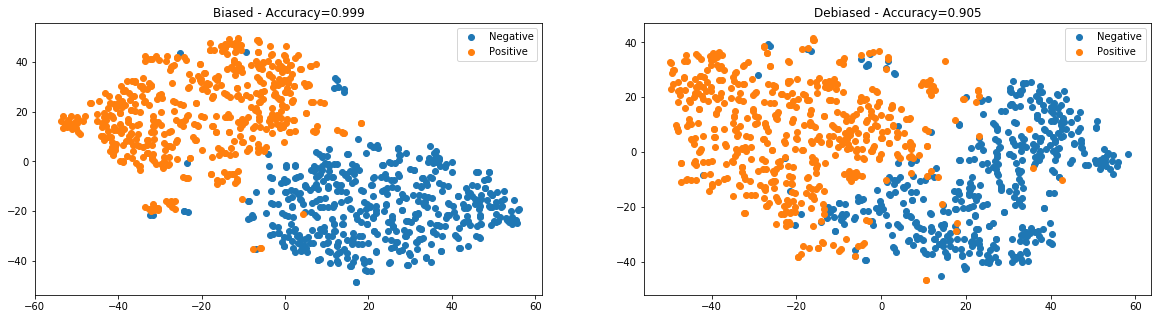

In [109]:
# Top 500 male-biased and top 500 female-biased words

GenderBiasWE.plot_most_biased_clustering(w2v_small_gender_bias, w2v_small_gender_debias);

Note: In the paper they got a stronger result, 92.5% accuracy for the debiased model.

### 💎 Strong words form the paper (emphasis mine):

> The experiments ...
reveal a **systematic bias** found in the embeddings,
which is **independent of the gender direction**.


> The implications are alarming: while suggested
debiasing methods work well at removing the gender direction, the **debiasing is mostly superficial**.
The bias stemming from world stereotypes and
learned from the corpus is **ingrained much more
deeply** in the embeddings space.


> .. real concern from biased representations is **not the association** of a concept with
words such as “he”, “she”, “boy”, “girl” **nor** being
able to perform **gender-stereotypical word analogies**... algorithmic discrimination is more likely to happen by associating one **implicitly gendered** term with
other implicitly gendered terms, or picking up on
**gender-specific regularities** in the corpus by learning to condition on gender-biased words, and generalizing to other gender-biased words.


![](images/banner.png)

# 💎💎 Meta "So What?" - II

## Can we debias at all a word embedding?

## Under some downstream use-cases, maybe the bias in the word embedding is desirable?

![](images/banner.png)

# 💻 Your Turn!

## Explore bias in word embedding by other groups (such as race and religious)

**Task 1.** Let's explor racial bias usint Tolga's approche. Will use the [`ethically.we.BiasWordEmbedding`](http://docs.ethically.ai/word-embedding-bias.html#ethically.we.bias.BiasWordEmbedding) class. `GenderBiasWE` is a sub-class of `BiasWordEmbedding`.

In [110]:
from ethically.we import BiasWordEmbedding

w2v_small_racial_bias = BiasWordEmbedding(w2v_small, only_lower=True)

#### 💎💎💎 Identify the racial direction using the `sum` method

In [111]:
white_common_names = ['Emily', 'Anne', 'Jill', 'Allison', 'Laurie', 'Sarah', 'Meredith', 'Carrie',
                      'Kristen', 'Todd', 'Neil', 'Geoffrey', 'Brett', 'Brendan', 'Greg', 'Matthew',
                      'Jay', 'Brad']

black_common_names = ['Aisha', 'Keisha', 'Tamika', 'Lakisha', 'Tanisha', 'Latoya', 'Kenya', 'Latonya',
                      'Ebony', 'Rasheed', 'Tremayne', 'Kareem', 'Darnell', 'Tyrone', 'Hakim', 'Jamal',
                      'Leroy', 'Jermaine']

w2v_small_racial_bias._identify_direction('Whites', 'Blacks',
                                          definitional=(white_common_names, black_common_names),
                                          method='sum')

#### Use the neutral profession names to measure the racial bias

In [ ]:
neutral_profession_names = BOLUKBASI_DATA['gender']['neutral_profession_names']

In [ ]:
neutral_profession_names[:10]

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_racial_bias.plot_projection_scores(neutral_profession_names, n_extreme=20, ax=ax);

#### Calculate the direct bias measure

In [ ]:
# Your Code Here...

#### Keep exploring the racial bias

In [ ]:
# Your Code Here...

**Task 2.** Open the [word embedding demo page in `ethically` documentation](http://docs.ethically.ai/notebooks/demo-word-embedding-bias.html#it-is-possible-also-to-expirements-with-new-target-word-sets-as-in-this-example-citizen-immigrant), and look on the use of the function [`calc_weat_pleasant_unpleasant_attribute`](). What was the attempt in that experiment? What was the result? Can you come up with other experiments?

In [ ]:
from ethically.we import calc_weat_pleasant_unpleasant_attribute

In [ ]:
# Your Code Here...

![](images/banner.png)

# Non-Technical Overview with more Downstream Application Examples:
[Google - Text Embedding Models Contain Bias. Here's Why That Matters.](https://developers.googleblog.com/2018/04/text-embedding-models-contain-bias.html)

# Additional Related Work

- Brunet, M. E., Alkalay-Houlihan, C., Anderson, A., & Zemel, R. (2018). [Understanding the Origins of Bias in Word Embeddings](https://arxiv.org/pdf/1810.03611.pdf). arXiv preprint arXiv:1810.03611.

- Zhao, J., Wang, T., Yatskar, M., Cotterell, R., Ordonez, V., & Chang, K. W. (2019). [Gender Bias in Contextualized Word Embeddings](https://arxiv.org/pdf/1904.03310.pdf). arXiv preprint arXiv:1904.03310.

- Zhou, P., Shi, W., Zhao, J., Huang, K. H., Chen, M., & Chang, K. W. [Analyzing and Mitigating Gender Bias in Languages with Grammatical Gender and Bilingual Word Embeddings](https://aiforsocialgood.github.io/icml2019/accepted/track1/pdfs/47_aisg_icml2019.pdf). ICML 2019 - AI for Social Good. [Poster](https://aiforsocialgood.github.io/icml2019/accepted/track1/posters/47_aisg_icml2019.pdf)


- Complete example of using `ethically` with Word2Vec, GloVe and fastText: http://docs.ethically.ai/notebooks/demo-gender-bias-words-embedding.html


# The Bigger Picture

1. FAT community - Fairness, Accountability, and Transparency
   - [ACM FAT*](https://fatconference.org)
   - [FATML](http://www.fatml.org)
   - [ML Fairness Book](https://fairmlbook.org)


2. NLP - around dozen of papers on this field until the last few months, but nowdays plenty of work is done. See: [1st ACL Workshop on Gender Bias for Natural Language Processing](https://genderbiasnlp.talp.cat/), [NAACL 2019](https://naacl2019.org/)


3. Tools: [ethically](https://docs.ethically.ai), [IBM AIF360](https://aif360.mybluemix.net/)


# 💎💎 Takeaways - Be Responsible

1. Think about your **downstream app**

2. Think about your **measurements** (a.k.a "what is a good system?")

3. Think about your **data** (corpus building, selection bias, train vs. validation vs. test datasets)

4. Think about the **impact** of your system on individuals, groups, society, and humanity, both for **long-term** and **scale-up**

# Guidlines and Checklists

- [Google - People + AI Guidebook](https://pair.withgoogle.com/)

- [Google - Responsible AI Practices](https://ai.google/responsibilities/responsible-ai-practices/)

- [Denon - Ethics Checklist for Data Scientists](http://deon.drivendata.org/)


![](images/banner.png)

<center><h1>THE END!</h1></center>